# Mappeoppgave 1 - Samfunnsøkonomisk analyse av en turistskatt

### Kandidat Number: --

In [1078]:
# SETUP

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from sympy.solvers import solve

from cycler import cycler
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pylab as pylab

from pyjstat import pyjstat
import requests

from IPython.display import display, HTML
HTML('<style>.input, .jp-InputArea {display: none !important}</style>')

# custome plot style
params  = {
"lines.linewidth": 1.5,

"legend.fancybox": "true",

"axes.prop_cycle": cycler('color', ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1","#87CEEB","#F08080"]),
"axes.facecolor": "#2b2b2b",
"axes.axisbelow": "true",
"axes.grid": "true",
"axes.edgecolor": "#2b2b2b",
"axes.linewidth": 0.5,
"axes.labelpad": 0,

"patch.edgecolor": "#2b2b2b",
"patch.linewidth": 0.5,

"grid.linestyle": "--",
"grid.linewidth": 0.5,
"grid.color": "#b8aba7",

"xtick.major.size": 0,
"xtick.minor.size": 0,
"ytick.major.size": 0,
"ytick.minor.size": 0,

"font.family":"monospace",
"font.size":10.0,
"text.color": "#FFE9E3",
"axes.labelcolor": "#b8aba7",
"xtick.color": "#b8aba7",
"ytick.color": "#b8aba7",

"savefig.edgecolor": "#2b2b2b",
"savefig.facecolor": "#2b2b2b",

"figure.subplot.left": 0.08,
"figure.subplot.right": 0.95,
"figure.subplot.bottom": 0.09,
"figure.facecolor": "#2b2b2b"}

pylab.rcParams.update(params)
#print("finish")

In [1079]:
# create graph function
def create_ax(x_label:str='x_label',y_label:str='y_label',lim:list=[(0,None),(0,None)],x_pos:str = 'right',y_pos:str='top'):
                fig, ax = plt.subplots(figsize=(10,5))
                ax.set_ylabel(y_label, loc=y_pos)
                ax.set_xlabel(x_label, loc=x_pos)
                ax.set(xlim=lim[0])
                ax.set(ylim=lim[1])
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

In [1080]:
POST_URL = "https://data.ssb.no/api/v0/no/table/10638/"

payload = {
  "query": [
    {
      "code": "KonsumInnd",
      "selection": {
        "filter": "item",
        "values": [
          "TOTK",
          "UTLK",
          "NOHT",
          "NONF"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "0",
          "01",
          "01.01",
          "01.02",
          "01.03",
          "01.04",
          "01.05",
          "01.06",
          "01.07",
          "01.08",
          "01.09",
          "01.10",
          "02"
        ]
      }
    },
       {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

resultat = requests.post(POST_URL, json = payload)
dataset = pyjstat.Dataset.read(resultat.text)
df_raw = dataset.write('dataframe')
source_ssb_konsum = "https://www.ssb.no/statbank/table/10638/"

POST_URL = "https://data.ssb.no/api/v0/no/table/10603/"

payload = {
  "query": [
    {
      "code": "HovedstReise",
      "selection": {
        "filter": "item",
        "values": [
          "BPROD"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "OTV",
          "SEV",
          "TRBSD",
          "TRSF",
          "TRF",
          "UTL",
          "RBAV",
          "KUV",
          "SAF"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

resultat = requests.post(POST_URL, json = payload)
dataset = pyjstat.Dataset.read(resultat.text)
df_raw2 = dataset.write('dataframe')
source_ssb_reiselivsN = "https://www.ssb.no/statbank/table/10603/"


In [1081]:
pd.set_option('display.max_rows', None)
df_raw['år'] = df_raw['år'].astype(int)
df_raw2['år'] = df_raw2['år'].astype(int)
df_raw['value'] = df_raw['value'].astype(float)
df_raw2['value'] = df_raw2['value'].astype(float)
df_raw=df_raw.dropna()
df_raw2=df_raw2.dropna()
#display(df)
#display(df2)
#display(df_raw[df_raw['år']==2020])
#display(df_raw2[df_raw2['år']==2020])

#Turist Growth Data
# Need to find DATA

#Nering Growth Data
df_overnight = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Overnattingsvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_service = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Serveringsvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_trasport_land = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Transport med buss, sporvei og drosje")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_trasport_sea = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Transport med skip og ferger")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_trasport_air = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Transport med fly")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_travel_service = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Reisebyrå- og reisearrangørvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_entertainmetn = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Kultur- og underholdningsvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_sport = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Sport og annen fritidsvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]

#display(df_overnight)

#Turist VS Norwegian Data
#[df_total_konsum['år'].isin([2011,2019,2020])]

df_konsum_11 = df_raw.loc[(df_raw['reiselivsnæring'] == "Turistkonsum i alt") & (df_raw['år'] == 2011)]
df_konsum_19 = df_raw.loc[(df_raw['reiselivsnæring'] == "Turistkonsum i alt") & (df_raw['år'] == 2019)]
df_konsum_20 = df_raw.loc[(df_raw['reiselivsnæring'] == "Turistkonsum i alt") & (df_raw['år'] == 2020)]

df_housekonsum_19 = df_raw.loc[(df_raw['reiselivsnæring'] == "Overnattingstjenester") & (df_raw['år'] == 2019)]

df_total_turist_konsum = df_raw.loc[(df_raw['konsumentgruppe'] == "Utlendingenes konsum i Norge") & (df_raw['år']==2019)]
df_total_n_konsum = df_raw.loc[(df_raw['konsumentgruppe'] == "Norske husholdningers turistkonsum i Norge") & (df_raw['år']==2019)]
df_total_nering_konsum = df_raw.loc[(df_raw['konsumentgruppe'] == "Norske næringers utgifter til forretningsreiser i Norge") & (df_raw['år']==2019)]


#display(df_overnatt_turist_konsum)
#display(df_total_turist_konsum[df_total_turist_konsum['år'].isin([2011,2019])])
#display(df_total_n_konsum[df_total_n_konsum['år'].isin([2011,2019])])
#display(df_total_nering_konsum[df_total_n_konsum['år'].isin([2011,2019])])


In [1082]:
'''
for I,T in enumerate(list(df_total_turist_konsum["value"])):
    N = list(df_total_n_konsum["value"])[I]
    B = list(df_total_nering_konsum["value"])[I]
    
    maxl = max([T,N,B])
    if T == maxl:
        print(f'T: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {T}')
    elif N == maxl:
        print(f'N: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {N}')
    else:
        print(f'T: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {T}')
'''

'\nfor I,T in enumerate(list(df_total_turist_konsum["value"])):\n    N = list(df_total_n_konsum["value"])[I]\n    B = list(df_total_nering_konsum["value"])[I]\n    \n    maxl = max([T,N,B])\n    if T == maxl:\n        print(f\'T: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {T}\')\n    elif N == maxl:\n        print(f\'N: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {N}\')\n    else:\n        print(f\'T: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {T}\')\n'

In [1083]:
def graph_overnattingstjenester_konsum_pie():
    
    # Settup
    graph_Xmin = -0.5
    graph_Xmax = 100
    graph_Ymin = 0
    graph_Ymax = 100

    Titel = 'Turist konsum 2019'
    
    #Create
    
    konsum_overnatt_total = int(df_housekonsum_19.loc[(df_housekonsum_19['konsumentgruppe'] == "Totalt konsum")]["value"])
    konsum_overnatt_turist = int(df_housekonsum_19.loc[(df_housekonsum_19['konsumentgruppe'] == "Utlendingenes konsum i Norge")]["value"])
    konsum_overnatt_n = int(df_housekonsum_19.loc[(df_housekonsum_19['konsumentgruppe'] == "Norske husholdningers turistkonsum i Norge")]["value"])
    konsum_overnatt_nering = int(df_housekonsum_19.loc[(df_housekonsum_19['konsumentgruppe'] == "Norske næringers utgifter til forretningsreiser i Norge")]["value"])

    
    konsum_percent_overnatt_turist = konsum_overnatt_turist/konsum_overnatt_total*100
    konsum_percent_overnatt_norsk = konsum_overnatt_n/konsum_overnatt_total*100
    konsum_percent_overnatt_forreting = konsum_overnatt_nering/konsum_overnatt_total*100

    konsum_overnatt_percent = [konsum_percent_overnatt_turist,konsum_percent_overnatt_norsk,konsum_percent_overnatt_forreting]
    konsum_overnatt_label = ["Utlendingenes konsum i Norge","Norske husholdningers\nturistkonsum i Norge", 'Norske næringers utgifter\ntil forretningsreiser i Norge']
    
    fig, ax = plt.subplots()
    
    # Graph    
    split_dis = (0.1, 0, 0) 
    _, txt, autotexts = ax.pie(konsum_overnatt_percent, 
                                       labels=konsum_overnatt_label,
                                       autopct='%1.1f%%',
                                       colors=["#f7c27c","#ffa822","#d57d26"],
                                       labeldistance=1.1,
                                       explode=split_dis
                                      )
    
    # Design    
    for autotext in autotexts:
        autotext.set_weight('bold')
        autotext.set_color('#2b2b2b')
        autotext.set_fontsize(14)
        
    ax.set_title(Titel)
    fig.text(0.6,0,"Source:%s"%(source_ssb_konsum))
    fig.text(0.05,0,"Figur 3")
    #return fig,ax

#graph_overnattingstjenester_konsum_pie()

In [1084]:
def graph_konsum_pie():
    
    # Settup
    graph_Xmin = -0.5
    graph_Xmax = 100
    graph_Ymin = 0
    graph_Ymax = 100

    Titel = 'Turist konsum 2019'
    
    #Create
    
    konsum_total = int(df_konsum_19.loc[(df_raw['konsumentgruppe'] == "Totalt konsum")]["value"])
    konsum_turist = int(df_konsum_19.loc[(df_raw['konsumentgruppe'] == "Utlendingenes konsum i Norge")]["value"])
    konsum_norsk = int(df_konsum_19.loc[(df_raw['konsumentgruppe'] == "Norske husholdningers turistkonsum i Norge")]["value"])
    konsum_forreting = int(df_konsum_19.loc[(df_raw['konsumentgruppe'] == 'Norske næringers utgifter til forretningsreiser i Norge')]["value"])
    
    konsum_percent_turist = konsum_turist/konsum_total*100
    konsum_percent_norsk = konsum_norsk/konsum_total*100
    konsum_percent_forreting = konsum_forreting/konsum_total*100

    konsum_percent = [konsum_percent_turist,konsum_percent_norsk,konsum_percent_forreting]
    konsum_label = ["Utlendingenes konsum i Norge","Norske husholdningers\nturistkonsum i Norge", 'Norske næringers utgifter\ntil forretningsreiser i Norge']
    
    fig, ax = plt.subplots()
    
    # Graph    
    split_dis = (0, 0.1, 0) 
    _, txt, autotexts = ax.pie(konsum_percent, 
                                       labels=konsum_label,
                                       autopct='%1.1f%%',
                                       colors=["#f7c27c","#ffa822","#d57d26"],
                                       labeldistance=1.1,
                                       explode=split_dis
                                      )
    
    # Design    
    for autotext in autotexts:
        autotext.set_weight('bold')
        autotext.set_color('#2b2b2b')
        autotext.set_fontsize(14)
        
    ax.set_title(Titel)
    fig.text(0.6,0,"Source:%s"%(source_ssb_konsum))
    fig.text(0.05,0,"Figur 2")
    #return fig,ax

#graph_konsum_pie()

In [1085]:
def graph_konsum():
    
    # Settup
    graph_Xmin = -0.5
    graph_Xmax = len(df_konsum_19["konsumentgruppe"])-0.5
    graph_Ymin = 0
    graph_Ymax = round(max(df_konsum_19['value']),-4)

    Titel = 'Turistkonsum i alt, base price 2020'
    xlabel = ['Totalt konsum','Utlendingenes\nkonsum i Norge','Norske husholdningers\nturistkonsum i \nNorge','Norske næringers\nutgifter til\nforretningsreise']
    
    #Create
    
    fig, ax = create_ax(x_label='',
                        y_label='NOK (mill. kr)',
                        lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)],
    )
    
    # Graph
    bar_width = 0.25
    group = df_konsum_11["konsumentgruppe"]
    xpos_axis = np.arange(len(group))
    
    ax.bar(xpos_axis-bar_width,df_konsum_11["value"], width=bar_width,color="#f7c27c")
    ax.bar(xpos_axis,df_konsum_19["value"], width=bar_width,color="#ffa822")
    ax.bar(xpos_axis+bar_width,df_konsum_20["value"], width=bar_width,color="#d57d26")


    # Design
    xlabel = ['2011  2019  2020\n%s'%(x) for x in xlabel]
    
    ax.set_title(Titel)
    ax.set_xticks(xpos_axis)
    ax.set_xticklabels(xlabel)
    fig.text(0.6,-0.1,"Source:%s"%(source_ssb_konsum))
    fig.text(0.05,-0.1,"Figur 1")
    return fig,ax

#graph_konsum()

In [1091]:
def graph_reiselivsnæring(graphs = [df_overnight,df_service,df_trasport_land,df_trasport_sea,df_trasport_air,df_travel_service,df_entertainmetn,df_sport]):
    # Settup
    graph_Xmin = 2011
    graph_Xmax = 2020
    graph_Ymin = 0
    graph_Ymax = 100
    
    for df_i in graphs:
        max_val = max(df_i['value'])
        if graph_Ymax < max_val:
            graph_Ymax = round(max_val,-4)

    Titel = 'reiselivsnæring bruttoproduction, base price 2020'
    
    #Create
    
    fig, ax = create_ax(x_label='YEAR',
                        y_label='NOK (mill. kr)',
                        lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)],
    )
    
    # Graph
   
    for df_i in graphs:
        ax.plot(df_i["år"],df_i["value"],label = df_i["reiselivsnæring"].iloc[0])

    # Design
    ax.set_title(Titel)
    ax.legend(bbox_to_anchor=(.7,-0.1),frameon=False,ncol=2,prop={'size': 8})
    fig.text(0.6,-0.2,"Source:%s"%(source_ssb_reiselivsN))
    fig.text(0.05,-0.2,"Figur 5")
    return fig,ax

#graph_reiselivsnæring()

In [1116]:
TAX=4
def demand(p:float=0.0,t:float=0.0):
    return (500-p)/3.2

def supply(p:float=0.0,t:float=0.0):
    return ((100+p)/4.3) + t

In [1117]:
# equilibrium price and quantity function
def equilib(_supply,_demand,extra_change_demand:float = 0,extra_change_supply:float = 0):
    p,t,T=sp.symbols('p t T', positive=True, real=True)
    eq_cond=sp.Eq(_demand(p,t),_supply(p,t))
    
    y_eq=sp.solve(eq_cond,p)
    y_eq_fn=sp.lambdify((t,T), y_eq[0])
    
    x_eq=_supply(y_eq[0],t)
    x_eq_fn=sp.lambdify((t,T), x_eq)
    
    y = y_eq_fn(extra_change_supply,extra_change_demand)
    x = x_eq_fn(extra_change_supply,extra_change_demand)
    return x,y

# surpluss functions
def consumer_surplus_fun(Ey,Ex):
    x=sp.symbols('x', real=True, positive=True)
    return sp.integrate(demand(x)-Ey,(x,0,Ex))

def producer_surplus_fun(Ey,Ex):
    x=sp.symbols('x', real=True, positive=True)
    return sp.integrate(Ey-supply(x),(x,0,Ex))


# draw lines to x and y ax
def graph_xy_line(ax,x,y):
    return ax.plot([0,x], [y, y], linestyle='dashed', color='white'),ax.plot([x,x], [y, 0], linestyle='dashed', color='white')

In [1121]:
def SupplyDemand():
    graph_Xmin = 180
    graph_Xmax = 300
    graph_Ymin = 45
    graph_Ymax = 105

    Ey,Ex = equilib(supply,demand)
    Ey2,Ex2 = equilib(supply,demand, extra_change_supply=TAX)
    Ey3 = Ey2-TAX

    x_num=np.linspace(0,500,100)
    q_num=np.linspace(0,Ex,100)
    p_num=np.linspace(0,Ey,100)
    d_num = np.linspace(Ex2,Ex,10)

    fig, ax = create_ax(x_label='Quantity',
                        y_label='Price',
                        lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)]
    )

    ax.plot(x_num,demand(x_num, 0), label='Demand ')
    ax.plot(x_num,supply(x_num, 0), label='Supply(t=0)')
    ax.plot(x_num,supply(x_num, TAX), label=f'Supply (t={TAX})')

    ax.scatter(Ex,Ey,zorder=2, color='white')
    ax.scatter(Ex2,Ey2,zorder=2, color='white')
    ax.scatter(Ex2,Ey3,zorder=2, color='white')

    ax.plot([0,Ex2], [Ey3, Ey3], linestyle='dashed', color='white')
    graph_xy_line(ax,Ex,Ey)
    graph_xy_line(ax,Ex2,Ey2)


    ax.fill_between(q_num,supply(q_num),Ey,where=q_num<=Ex2,alpha = 0.3,label="Producer Surplus",interpolate=True)#Produsentoverskudd
    ax.fill_between(q_num,demand(q_num),Ey,where=q_num<=Ex2,alpha = 0.3,label="Consumer Surplus",interpolate=True)#Konsumentoverskudd

    ax.fill_between(q_num,Ey2,Ey3,where=q_num<=Ex2,color="#B06AFF",alpha = 0.5,label="Tax Revenu")#Tax

    ax.fill_between(d_num,supply(d_num),demand(d_num),color="#FF21E1",alpha = 0.5,label="Deadweight")#Deadweight

    ax.text(Ex,graph_Ymin, f"{round(Ex,2)}", fontsize=10,rotation=-90)
    ax.text(Ex2,graph_Ymin, f"{round(Ex2,2)}", fontsize=10,rotation=-90)

    ax.text(graph_Xmin,Ey3-5, f"{round(Ey3,2)}", fontsize=10)
    ax.text(graph_Xmin,Ey2+3, f"{round(Ey2,2)}", fontsize=10)

    ax.set_title('Supply, Demand and Surplus')
    ax.legend(loc='lower left',frameon=False,ncol=2,prop={'size': 8})
    #fig.text(0.6,0,"Source:%s"%("Calculated"))
    fig.text(0.05,0,"Figur 6")
    
#SupplyDemand()

### Kapittel 1 - Innledning

Når du skal på ferie, så er det flere ting som kan være med på at det stedet du velger blir valgt. Om det er naturen, strendene og havet, heller kulturen og historien, slik områder ofte også har museumer får historien, guided turer slik som hval sightisng i tromsø, heller natur områder slik som parker heller strender. Uansett ka du velger så må de tingene velikesholdes og for det så trenger man penger.

Og det er der turistskatt kommer inn. Tanken er at med å skatte turister med en lokal skatt som kan brukes av staten heller turist organisasjoner så kan intekten fra skatten bli brukt får å velikeholding og mulig utbygging av turist atraksjoner, så i teorien skal det ha en posetive effect på turistmarkedet, flere og bedre atraksjoner betyr flere turister, dermed kan lokal bedriftene tjene mer.

Turistskatt er ofte lagt på toppen av overnatts områder slik som hoteler heller airbnb. Det kan også bli lagt til atraksjoner slik som museumer heller guided turer. 

Som et litt eksempel så du kan forestil at du bestemer deg å dra på ferie til Tromsø, og når du skjekker inn på hotelet så betaler du en turistskatt når du skjekker inn, og dagen etterpå karnsje du tar deg en guided tur får å se nordlys og der kan det være at du også må betale du en litten extra skatt.

Du kan fort se fra det eksemplet at, ja turistskatt vil hjelpe til med velikehold og utbygging av turistattraksjoner, men det kan fort minke mengen de vill bruke totalt på andre områder siden deler av ferie budsjetet blir ete opp av skatten. Men det er igjen også en grei måtte og kontrollere mengde turister som kommer

(<Figure size 1000x500 with 1 Axes>,
 <AxesSubplot: title={'center': 'reiselivsnæring bruttoproduction, base price 2020'}, xlabel='YEAR', ylabel='NOK (mill. kr)'>)

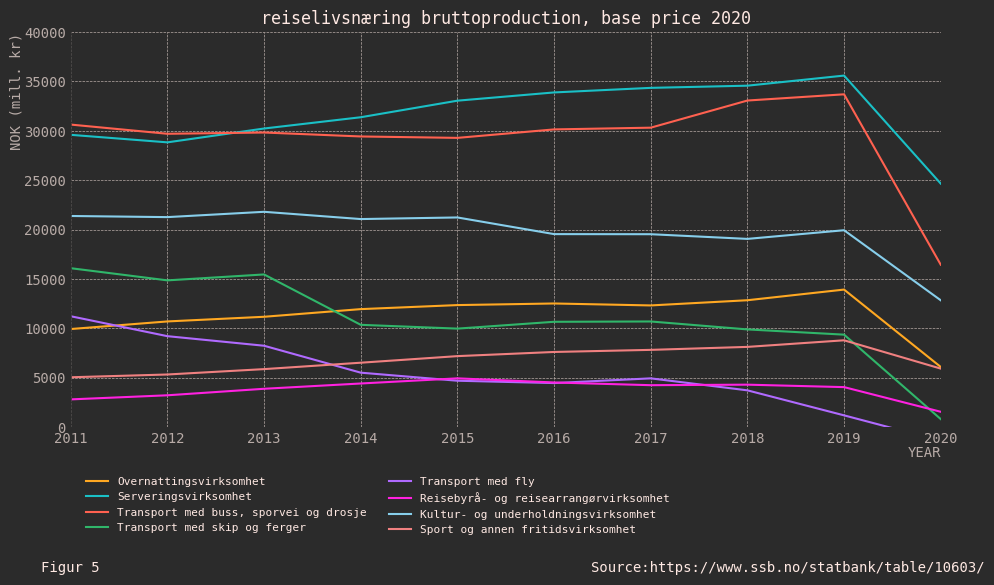

In [1099]:
graph_reiselivsnæring()

Slik vi kan se i denne figuren over oss (figur 5), så kan vi se hvordan de forskjellige industriene har beveg deg gjennom de siste 10 årende, vi kan også se at de største næringene er land trasport, med buss og drosjer, og serveringsvirksomheten, som includerer kafer, resturanter, gatekjøkken... etc. 

### Kapittel 2 - Turistnæringen i Norge

(<Figure size 1000x500 with 1 Axes>,
 <AxesSubplot: title={'center': 'Turistkonsum i alt, base price 2020'}, ylabel='NOK (mill. kr)'>)

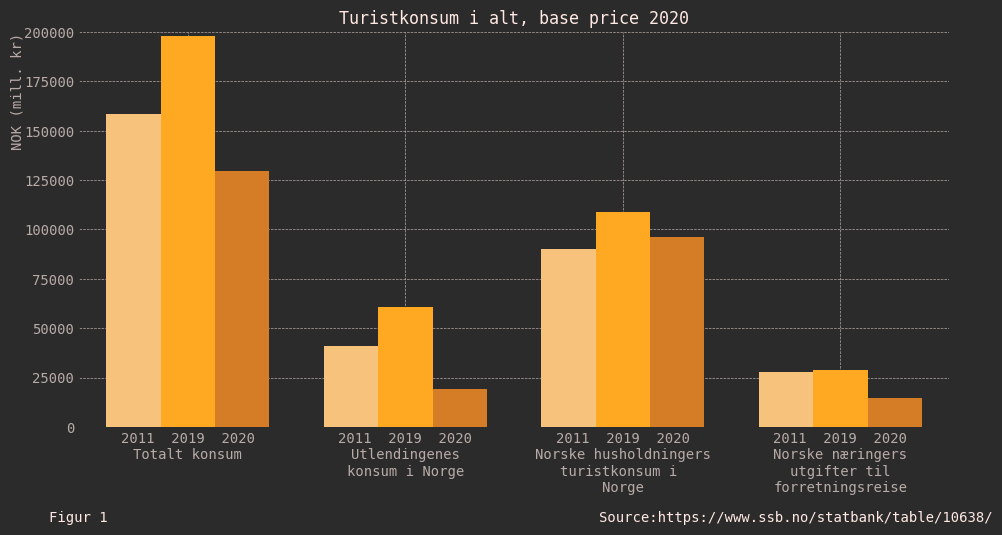

In [1095]:
graph_konsum()

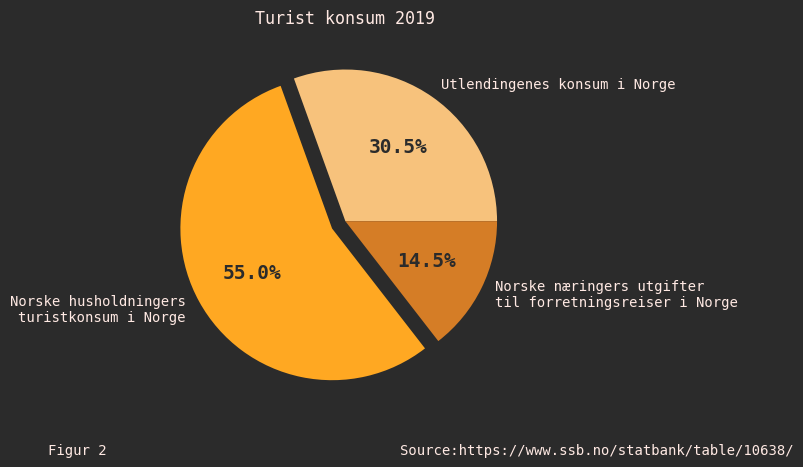

In [1096]:
graph_konsum_pie()

I Norge så kommer mesteparten av turist relatert inkom fra norske beboere slik man kan se i r søylediagrame over (figur 1). Her ser vi på de to mittersete gruppene, mellom "Utlendingens konsum i Norge" og "Norske husholfingers turistkonsum i Norge" så ser vi Norske husholdninger bruker bra mye mer en turister, nesten d dobbelt, med untakk av 2020 som viser en abnormal høy forskjell, og vi kan annta at det er mestsansynneling på grund av covid-19. Og i pie diargramet så kan vi se nøyakting hvor stor andel det Norske hushold er av det som kvalifisers som turistatraksjoner.

Men når vi fjerner ting slik som transport, underholding, service, utelive...etc. Så står vi igjen med to områder hvor turister bruker mer, det er:
* Utleie av transportmidler
* Overnattingstjenester 

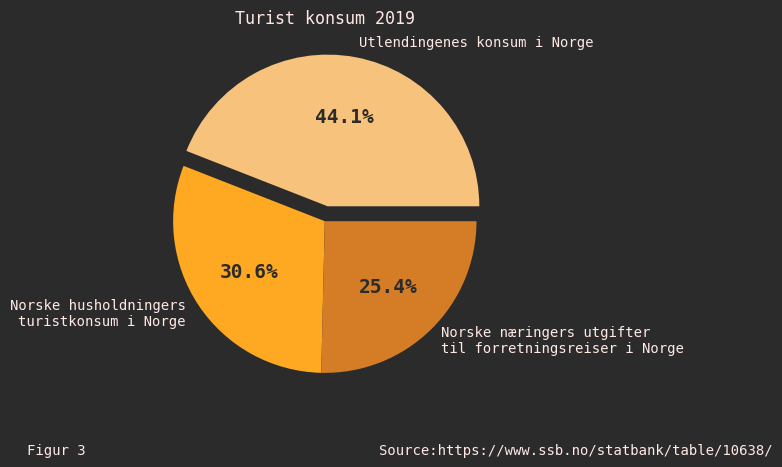

In [1097]:
graph_overnattingstjenester_konsum_pie()

Her i figur 3, så ser vi hvor mye turister bruker i forhold til totalen. Og dette kan vi bruke som en idea om hvor vi skal sette turistskatten, hvis intente er å skatt utenlanske turister så er overnattings tjensester slik som hotell, airBNB og similere tjenester det beste området å sett skatten.

### Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt

Hvis vi faktsik prøver å se på hva som skjer når du legger til turistskatt på overnattings områder så vil vi se to ting skje:
* Prisene på rommene vil gå opp pga skatten
* Og ferre folk vil kunde ta seg rå til å dra på ferige ditt

Hvis vi no setter dette opp på en graph, med enn dell asumptions. så kan vi få en simplified model av et marked. Vi kommer til å bruke graphen under som ett enkelt exsempel

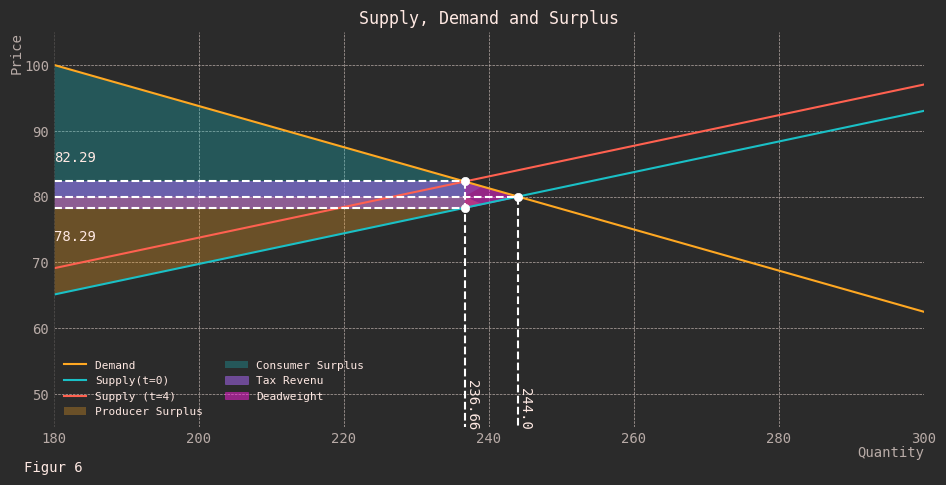

In [1122]:
SupplyDemand()

Her i figur 6 ser vi en visuel reprentasjon av hva som vil skje med overnattings markeded hvis man legger til en turistskatt. 
Vi kan se en demand curve som reprentiserer vilignessen til kunder å betale den prisen for ett rom for en natt. 
Vi har også to supply linjer som visser hva overnattings tjenestene er villing til å ta betalt for per rom per natt.
* Supply (t=0) er linjen som hviser hvordan markedet er nu, uten en skatt.
* Supply (t=4) er linken som hviser hvordan markedet kan være med en skatt på 4NOK per natt.

I supply curven uten skatt så ser vi at området det krysser demand curven er lengere ute (quantity = 244), som betyr at overnattings servicen can handle flere turister, imens hvis vi følger linjen med en skatt på 4NOK fløtter equilibrium pointet seg bakk, som visser at dem ønsker og holde like mye intekt så må de øke prisen mens de minker mengde turister.

Dette er bare får å visuelt visse at hvis man legger inn en skatt, så må man forvente lavere mengde turister. Som igjen kan være nokka man ønsker, å minimere mengde stress turistene tar på lokal området. Men det kan være at man ønsker å bygge ut turist industrien i lokal området, så da burde man være klar over at dette er nokka som kan skje.

Vi kan også se to områder kalt Consumer Surplus og Producer Surplus, som viser området hvor consumeren betaler mindre en det de er viling til og betale. Som og produceren får selgt productet sitt for mer en minimum prisen demmes.

Overlapping med surplus området er Tax Revenue som er mengden som er betalt av consumer og produser, i dette tilfele turisten og hotelet, her ser vi hvor mye hver av dem må betale extra for denne skatten, hvis vi antar dem deler den. Selvfølgelig så kan overnattings servicene sette full ansvaret for skatten på turistene, men det vil gjøre en større impact på turist mengden.

Sist så har vi deadweight som viser et området hvor vi før kunne gjøre handel i, men etter skatt så er det ikke "Parento optimal", det vil si at det er forbi equilibrium, det er i området hvor mer er produser, en folk er vilig til og kjøpe for den prisen. Og grunden den er der, er pågrund av den nye supply curven med skatt.  

### Kapittel 4 - Konklusjon

Vi har sett litt på hvor man kan fokusere skatten, avhengig av hvem man ønsker skal betale denne skatten. Overnattings services slik som hotell og airBNB er best for utenlanske turister, og muligensk utleie av transport. Men hvis målet er å tjenne inn en større menge lokal skatt, så public transport slik som busser og drosjer ett bedre valg. 

Vi har også sett hvordan en turistskatt på et overnatingsmarked kan påvirke både demmes inkom og turist mengden.